# **Projet final Datascience**

![](crisp_dm1.png)

#### **Introduction du contexte et étapes du projet**

**Jeu de données**
- Cet ensemble de données contient des informations sur les voitures d'occasion

**But de ce projet**
- Prédiction des prix de voiture

**Etape du projet** 
1. Import des bibliothèques
2. Présentation des données
3. Préparation et nettoyage des données
4. Visualisation des données 
5. Ajustement des données
6. Visualisation après ajustement des données
7. Utilisation de Machine Learning 

#### **1 - Import des différentes bibliothèques**

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### **2 - Présentation du jeu de données et des différentes valeurs**

**Lecture du fichier CSV**

In [154]:
df = pd.read_csv('car_data.csv')

**2.1 - Analyse de surface du dataset :** 
- Shape
- Colonnes
- Nombre de données nulles

In [155]:
print("Voici la shape du dataframe : " +  str(df.shape))
print("Les différentes colonnes du dataset sont : " +",".join(df.columns))
print(df.isnull().sum())

Voici la shape du dataframe : (301, 9)
Les différentes colonnes du dataset sont : Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


**2.2 - Visualisation des 5 premières lignes du dataset**

In [156]:
print(df.head(5))

  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  


**2.3 - Présentation des colonnes avec des valeurs numériques**

In [157]:
df[['Selling_Price','Present_Price','Kms_Driven']].describe()

,Selling_Price,Present_Price,Kms_Driven
count,301.000000,301.000000,301.000000
mean,4.661296,7.628472,36947.205980
std,5.082812,8.644115,38886.883882
min,0.100000,0.320000,500.000000
25%,0.900000,1.200000,15000.000000
50%,3.600000,6.400000,32000.000000
75%,6.000000,9.900000,48767.000000
max,35.000000,92.600000,500000.000000


#### **3 - Préparation et nettoyage des données**

**3.1 - Suppression de colonnes :**
- "Car_Name" est une colonne inutile pour prédire le prix d'une fonction en fonction des différentes features

In [158]:
df = df.drop('Car_Name',axis=1)
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


**3.2 - Visualisation des données catégorielles**

In [159]:
print(df['Fuel_Type'].value_counts())
print("\n")
print(df['Seller_Type'].value_counts())
print("\n")
print(df['Transmission'].value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64


Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64


Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


**3.3 - Suppression des données qui ne sont pas exploitable**
- Nous allons supprimer les deux lignes qui correspondent à CNG dans Fuel_Type

In [160]:
lineToDrop = df[df['Fuel_Type'] == 'CNG'].index
df = df.drop(lineToDrop)

**3.4 - Changements dans le dataset :** 
- Ajout de la colonne age pour la simplicité de compréhension de la vieillesse d'une voiture
- Suppression de la colonne Year qui ne sert plus à rien

In [161]:
maxAge = df['Year'].max()
df['carAge'] = (maxAge+ 1) - df['Year']

**3.5 - Suppression des doublons :** 
- Eviter de donner trop de poids à des informations
- Amélioration de la généralisation des données

In [162]:
print("Shape avant dédoublonnage : " + str(df.shape))
duplicatedToDrop = df[df.duplicated() == True].index
print("Les index à supprimer sont : " + str(duplicatedToDrop))
df = df.drop(duplicatedToDrop)
print("Shape après dédoublonnage : " + str(df.shape))


Shape avant dédoublonnage : (299, 9)
Les index à supprimer sont : Index([17, 93], dtype='int64')
Shape après dédoublonnage : (297, 9)


#### **4 - Visualisation des données**
- Visualisation des différentes Features en fonction du prix de vente

In [163]:
# Ajustement de valeurs pour les rendre plus lisible
df['Kms_Driven'] = df['Kms_Driven'] / 1000

**4.1 - Utilisation des scatter plots**
- Relation entre deux variables
- Identification des outliers 
- Comprendre la distribution des données

C:\Users\valen\AppData\Local\Temp\ipykernel_18624\2893624991.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


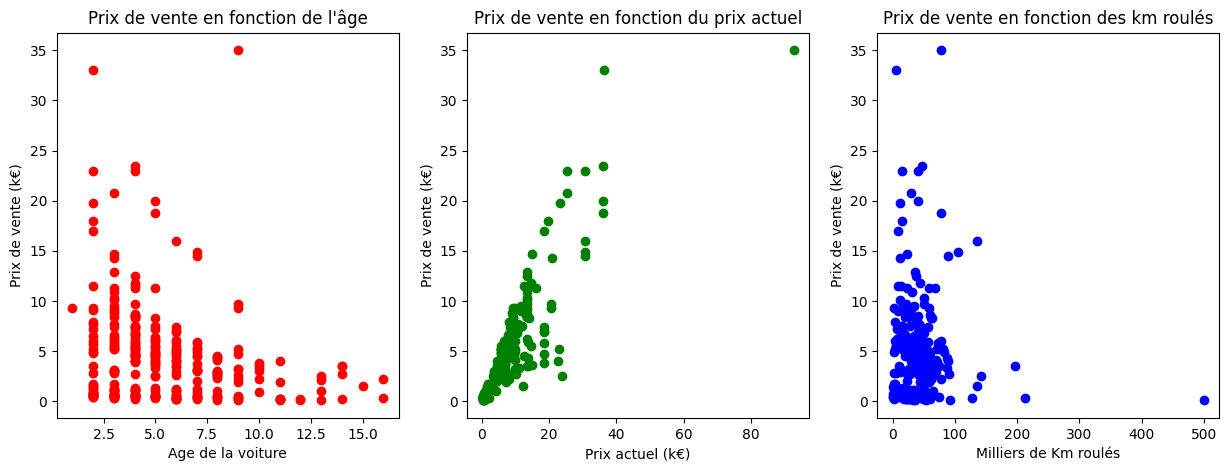

In [164]:
fig,axes = plt.subplots(nrows=1,ncols=3, figsize=(15,5))

# Figure 1
axes[0].scatter(df['carAge'],df['Selling_Price'], color='r')
axes[0].set_title('Prix de vente en fonction de l\'âge')
axes[0].set_xlabel('Age de la voiture')
axes[0].set_ylabel('Prix de vente (k€)')

# Figure 2 
axes[1].scatter(df['Present_Price'],df['Selling_Price'], color='g')
axes[1].set_title('Prix de vente en fonction du prix actuel')
axes[1].set_xlabel('Prix actuel (k€)')
axes[1].set_ylabel('Prix de vente (k€)')

# Figure 3
axes[2].scatter(df['Kms_Driven'],df['Selling_Price'],color='b')
axes[2].set_title('Prix de vente en fonction des km roulés')
axes[2].set_xlabel('Milliers de Km roulés')
axes[2].set_ylabel('Prix de vente (k€)')

fig.show()

**4.2 - Analyse des boxplot pour enlever les outliers**
- Résumé visuel de la distribution
- Identification des outliers
- Symétrie et forme de la distribution

![](boxplot1.png)


Médiane du prix actuel (k€): 6.1
Max. du prix actuel (k€): 92.6
Min. du prix actuel (k€): 0.32


Médiane des km roulés (k€): 31.604
Max. des km roulés (k€): 500.0
Min. des km roulés (k€): 0.5


C:\Users\valen\AppData\Local\Temp\ipykernel_18624\3871327782.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


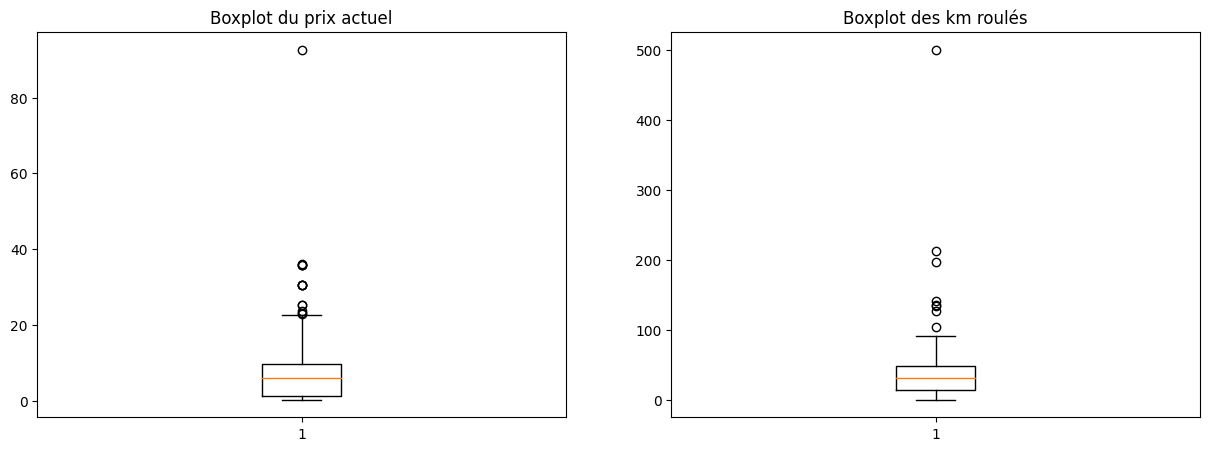

In [165]:
fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(15,5))
 
# Fig 1 
axes[0].boxplot(df['Present_Price'])
axes[0].set_title('Boxplot du prix actuel')

# Fig 2
axes[1].boxplot(df['Kms_Driven'])
axes[1].set_title('Boxplot des km roulés')

fig.show()

print("Médiane du prix actuel (k€): " + str(df['Present_Price'].median()))
print("Max. du prix actuel (k€): " + str(df['Present_Price'].max()))
print("Min. du prix actuel (k€): " + str(df['Present_Price'].min()))

print('\n')

print("Médiane des km roulés (k€): " + str(df['Kms_Driven'].median()))
print("Max. des km roulés (k€): " + str(df['Kms_Driven'].max()))
print("Min. des km roulés (k€): " + str(df['Kms_Driven'].min()))


#### **5 - Ajustement des données**

**Outliers**
- Calculer les quartiles et écart interquartile
- Etablir les seuils pour l'élimination des outliers
- Suppression des outliers

**Pourquoi supprime t-on les outliers ?**
- Eviter d'émettre des hypothèses erronées
- Mauvaise généralisation du/des modèles aux nouvelles données
- Rends le modèle moins robuste et plus sujet aux erreurs de prédictions

In [166]:
# ==================================Prix actuel 

q1PresentPrice = np.percentile(df['Present_Price'],25)
q3PresentPrice = np.percentile(df['Present_Price'],75)

# Calcul de l'espace inter-quartile
iqrPresentPrice = q3PresentPrice - q1PresentPrice

# Plage de la borne IQR
borneInfPresentPrice = q1PresentPrice - 1.5 * iqrPresentPrice
bornSupPresentPrice = q3PresentPrice + 1.5 * iqrPresentPrice

# Filtrer les indices des données qui sont en dehors de la plage interquartile
indexSupprimer = df[(df['Present_Price'] < borneInfPresentPrice) | (df['Present_Price'] > bornSupPresentPrice)].index

print("Shape avant : " + str(df.shape))
df = df.drop(indexSupprimer)

# Affichage des données des index qui vont être supprimés
print("Index des données à supprimer : " + str(indexSupprimer))
print("Shape après :" + str(df.shape))


Shape avant : (297, 9)
Index des données à supprimer : Index([50, 51, 53, 59, 62, 63, 64, 66, 78, 79, 82, 85, 86, 96], dtype='int64')
Shape après :(283, 9)


In [167]:
# ==================================Km roulés 

q1KmDriven = np.percentile(df['Kms_Driven'],25)
q3KmDriven = np.percentile(df['Kms_Driven'],75)

# Calcul de l'espace inter-quartile
iqrKmDriven = q3KmDriven - q1KmDriven

# Plage de la borne IQR
borneInfKmDriven = q1KmDriven - 1.5 * iqrKmDriven
bornSupKmDriven = q3KmDriven + 1.5 * iqrKmDriven

# Filtrer les indices des données qui sont en dehors de la plage interquartile
indexSupprimerKm = df[(df['Kms_Driven'] < borneInfKmDriven) | (df['Kms_Driven'] > bornSupKmDriven)].index

print("Shape avant : " + str(df.shape))
df = df.drop(indexSupprimerKm)

# Affichage des données des index qui vont être supprimés
print("Index des données à supprimer : " + str(indexSupprimerKm))
print("Shape après :" + str(df.shape))


Shape avant : (283, 9)
Index des données à supprimer : Index([37, 77, 84, 179, 196], dtype='int64')
Shape après :(278, 9)


#### **6 - Visualisation après ajustement des données**

C:\Users\valen\AppData\Local\Temp\ipykernel_18624\2068268727.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


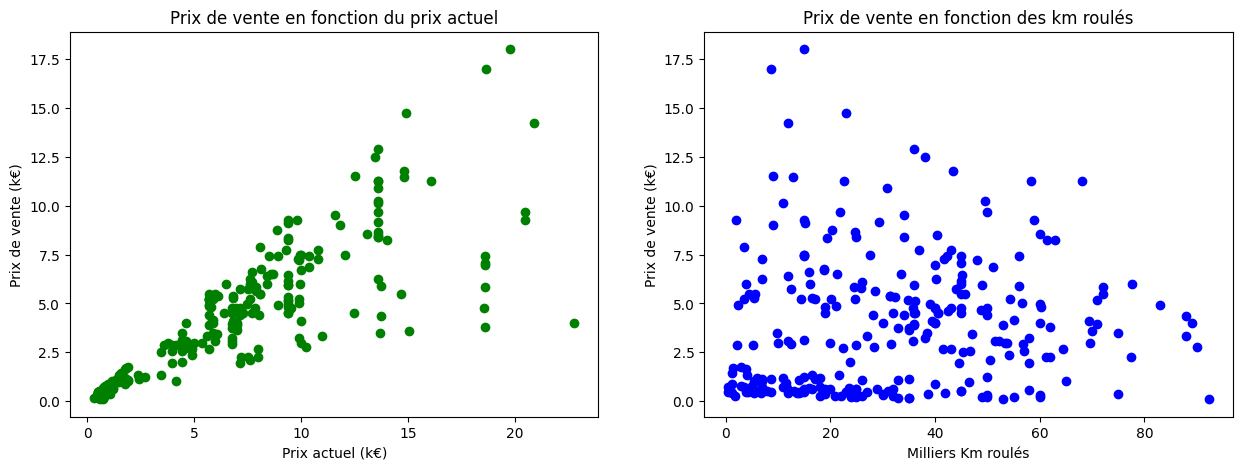

In [168]:
fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(15,5))

# Figure 2 
axes[0].scatter(df['Present_Price'],df['Selling_Price'], color='g')
axes[0].set_title('Prix de vente en fonction du prix actuel')
axes[0].set_xlabel('Prix actuel (k€)')
axes[0].set_ylabel('Prix de vente (k€)')

# Figure 3
axes[1].scatter(df['Kms_Driven'],df['Selling_Price'],color='b')
axes[1].set_title('Prix de vente en fonction des km roulés')
axes[1].set_xlabel('Milliers Km roulés')
axes[1].set_ylabel('Prix de vente (k€)')

fig.show()

C:\Users\valen\AppData\Local\Temp\ipykernel_18624\3110130169.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Médiane du prix actuel (k€): 5.9
Max du prix actuel (k€): 22.78
Min du prix actuel (k€): 0.32


Médiane des km roulés (k€): 30.0
Max des km roulés (k€): 92.233
Min des km roulés (k€): 0.5


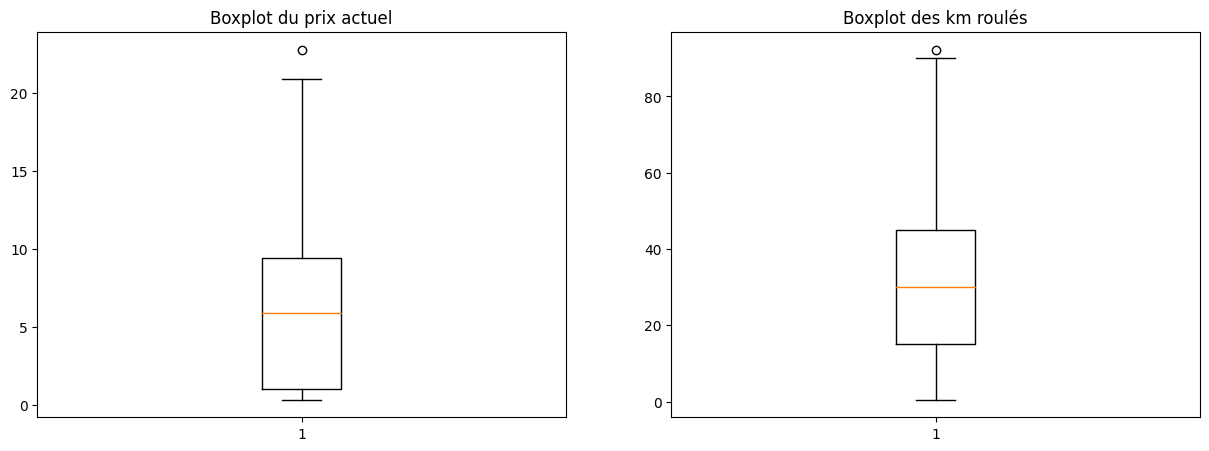

In [169]:
fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(15,5))
 
# Fig 1 
axes[0].boxplot(df['Present_Price'])
axes[0].set_title('Boxplot du prix actuel')

# Fig 2
axes[1].boxplot(df['Kms_Driven'])
axes[1].set_title('Boxplot des km roulés')

fig.show()

print("Médiane du prix actuel (k€): " + str(df['Present_Price'].median()))
print("Max du prix actuel (k€): " + str(df['Present_Price'].max()))
print("Min du prix actuel (k€): " + str(df['Present_Price'].min()))

print("\n")

print("Médiane des km roulés (k€): " + str(df['Kms_Driven'].median()))
print("Max des km roulés (k€): " + str(df['Kms_Driven'].max()))
print("Min des km roulés (k€): " + str(df['Kms_Driven'].min()))

In [170]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,carAge
count,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000
mean,2013.766187,3.922266,6.232518,31.958899,0.035971,5.233813
std,2.705658,3.384296,5.108966,21.003957,0.186554,2.705658
min,2003.000000,0.100000,0.320000,0.500000,0.000000,1.000000
25%,2012.000000,0.757500,1.005000,15.000000,0.000000,3.000000
50%,2014.000000,3.475000,5.900000,30.000000,0.000000,5.000000
75%,2016.000000,5.787500,9.400000,45.058500,0.000000,7.000000
max,2018.000000,18.000000,22.780000,92.233000,1.000000,16.000000


#### **7 - Utilisation de Machine Learning**

Utilisation de scikit Learn 

##### **7.1 - Import des différents élément de scikit-Learn**

In [171]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

##### **7.2 - Séparation des données en train/Test**

In [172]:
# Séparation données / objectif
X = df[['Year', 'Present_Price', 'Kms_Driven', 'Owner', 'carAge']]
y = df['Selling_Price']

# Création d'un test & training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


##### **7.3 - Instanciation du modèle**

In [173]:
# model = Ridge(alpha=0.5) # mse == 3.17
# model = Lasso(alpha=0.1) # mse == 3.08
model = LinearRegression() # mse == 3.05

# Entrainement du modèle
model.fit(X_train_scaled, y_train)

# Demander une prediction au modèle
predictions = model.predict(X_test_scaled)

# Evaluation du modèle via mse
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1.953523590557134


##### **7.4 - Prédiction**

In [174]:
pred_list = list(predictions)
y_test_list = list(y_test)

# comparaison des prix side/side
for i in range(len(pred_list[:5])):
    print(f"Prediction:{round(pred_list[i],2)}, actuel: {y_test_list[i]}")

Prediction:4.64, actuel: 4.95
Prediction:0.78, actuel: 0.55
Prediction:4.18, actuel: 6.0
Prediction:-0.51, actuel: 0.45
Prediction:8.81, actuel: 8.65
